# Anime Rating Case Study

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Objective

To preprocess the raw data, analyze it, and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- startYr - year that airing started
- finishYr - year that airing finished
- sznOfRelease - the season of release (Winter, Spring, Fall)
- description - the synopsis of the plot
- contentWarn - content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- studio_primary - studios responsible for creation
- studios_colab - studios responsible for creation
- tag_<tag/genre> - whether the anime has the certain tag or falls in the certain genre

## Let's start coding!

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("anime_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 14578 rows and 49 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,studio_primary,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
13764,Spy Penguin (2013): White Christmas,Web,1.0,2.0,False,2013.0,2013.0,NaN,NaN,0,8.0,0,10,0,NaN,NaN,Others,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3782,A Little Snow Fairy Sugar Summer Specials,TV Special,2.0,NaN,False,2003.0,2003.0,NaN,"One day, when Saga finds an old princess costu...",0,1056.0,24,576,16,3.449,571.0,J.C. Staff,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2289,Umineko: When They Cry,TV,26.0,NaN,False,2009.0,2009.0,Summer,"In the year 1986, eighteen members of the Ushi...",1,10896.0,1451,8480,1236,3.787,9463.0,Studio Deen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5081,Unbreakable Machine-Doll Specials,DVD Special,6.0,5.0,False,2013.0,2014.0,NaN,NaN,1,1957.0,201,756,50,3.169,1312.0,Others,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
9639,Hanako Oku: Hanabi,TV,1.0,6.0,False,2015.0,2015.0,NaN,NaN,0,46.0,1,54,1,2.166,33.0,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12608,Tamagotchi Honto no Hanashi,Movie,1.0,20.0,False,1997.0,1997.0,NaN,NaN,0,11.0,2,18,0,NaN,NaN,Others,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6735,Violinist of Hamelin Movie,Movie,1.0,30.0,False,1996.0,1996.0,NaN,"While on their quest to stop the Demon King, t...",0,247.0,6,167,8,2.826,152.0,Nippon Animation,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12846,Neko Kikaku,Movie,1.0,37.0,False,2018.0,2018.0,NaN,Nyagoya City is a trendy town where cats live....,0,12.0,3,102,2,NaN,NaN,Others,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
884,Saint Young Men Movie,Movie,1.0,90.0,False,2013.0,2013.0,NaN,Jesus and Buddha are enjoying their vacation i...,0,2726.0,68,2074,37,4.156,1962.0,A-1 Pictures,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10524,Delinquent Hamsters / papalion ft. Piso Studio,Web,1.0,2.0,False,2017.0,2017.0,Fall,NaN,0,18.0,0,18,0,1.927,10.0,Others,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

* The `duration` column has a wide range of values (2 to 90 minutes).
* The `sznOfRelease` column has a lot of missing values.
* A lot of the anime have just one episode, indicating they might be movies.

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         14578 non-null  object 
 1   mediaType                     14510 non-null  object 
 2   eps                           14219 non-null  float64
 3   duration                      9137 non-null   float64
 4   ongoing                       14578 non-null  bool   
 5   startYr                       14356 non-null  float64
 6   finishYr                      14134 non-null  float64
 7   sznOfRelease                  3767 non-null   object 
 8   description                   8173 non-null   object 
 9   contentWarn                   14578 non-null  int64  
 10  watched                       14356 non-null  float64
 11  watching                      14578 non-null  int64  
 12  wantWatch                     14578 non-null  int64  
 13  d

<IPython.core.display.Javascript object>

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the rating of an anime, which is of *float* type.
* `ongoing` column is of *bool* type.

In [8]:
# checking for missing values in the data.
df.isnull().sum()

title                               0
mediaType                          68
eps                               359
duration                         5441
ongoing                             0
startYr                           222
finishYr                          444
sznOfRelease                    10811
description                      6405
contentWarn                         0
watched                           222
watching                            0
wantWatch                           0
dropped                             0
rating                           2471
votes                            2459
studio_primary                      0
studios_colab                       0
tag_'Comedy'                        0
tag_'Based on a Manga'              0
tag_'Action'                        0
tag_'Fantasy'                       0
tag_'Sci Fi'                        0
tag_'Shounen'                       0
tag_'Family Friendly'               0
tag_'Original Work'                 0
tag_'Non-Hum

<IPython.core.display.Javascript object>

* There are missing values in many columns.

In [9]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,14578,14578,TWO-MIX: White Reflection,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,14510,8,TV,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,14219,NaN,NaN,NaN,13.5012,62.2622,1,1,1,12,2527
duration,9137,NaN,NaN,NaN,23.4651,30.777,1,3,8,29,235
ongoing,14578,2,False,14356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,14356,NaN,NaN,NaN,2005.46,14.7071,1907,2000,2010,2016,2026
finishYr,14134,NaN,NaN,NaN,2005.52,14.6565,1907,2000,2010,2016,2026
sznOfRelease,3767,4,Spring,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8173,8108,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,14578,NaN,NaN,NaN,0.0980244,0.297358,0,0,0,0,1


<IPython.core.display.Javascript object>

* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.
* *TV* is the most occurring type of media.
* For anime whose season of release is available, *Spring* is the most common season.
* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in `rating` column as it is the target variable.

In [10]:
df.dropna(subset=["rating"], inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            6
finishYr                         121
sznOfRelease                    8560
description                     4474
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
t

<IPython.core.display.Javascript object>

### Let us look at the entries with no start year.

In [12]:
df[df.startYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,studio_primary,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
1405,Unbelievable Space Love,Web,10.0,1.0,False,NaN,NaN,NaN,NaN,0,90.0,16,343,0,4.012,54.0,Others,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5225,Manbo-P: Irokoizata wa Subete Sakuzu de Kaiket...,Music Video,1.0,5.0,False,NaN,NaN,NaN,NaN,0,41.0,0,25,0,3.139,20.0,Others,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9821,Mameshiba: Mamerry Christmas,Other,1.0,1.0,False,NaN,NaN,NaN,NaN,0,57.0,1,17,0,2.119,35.0,Others,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10270,Meow no Hoshi,Other,1.0,5.0,False,NaN,NaN,NaN,NaN,0,40.0,0,25,0,1.999,25.0,Others,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11982,Landmark,Web,1.0,4.0,False,NaN,NaN,NaN,NaN,0,34.0,0,9,0,1.256,21.0,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12089,Burutabu-chan,Other,3.0,1.0,False,NaN,NaN,NaN,NaN,0,46.0,1,10,1,1.046,33.0,Others,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

* We will drop the entries with no start year as this is a difficult column to impute.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [13]:
df.dropna(subset=["startYr"], inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [15]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                         115
sznOfRelease                    8554
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
t

<IPython.core.display.Javascript object>

### Let us look at the entries with no finish year.

In [16]:
df[df.finishYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,studio_primary,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others
13,Kaguya-sama: Love Is War?,TV,10.0,NaN,True,2020.0,NaN,Spring,The battle between love and pride continues! N...,0,NaN,6368,5747,96,4.617,2359.0,A-1 Pictures,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
46,Douluo Dalu 2,Web,82.0,22.0,True,2018.0,NaN,NaN,Second season of Douluo Dalu.,0,NaN,1167,990,32,4.540,549.0,Others,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
70,Fruits Basket 2nd Season,TV,10.0,NaN,True,2020.0,NaN,Spring,Second season of Fruits Basket.,0,NaN,4160,4427,55,4.527,1194.0,TMS Entertainment,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,Ascendance of a Bookworm: Part II,TV,11.0,NaN,True,2020.0,NaN,Spring,"With her baptism ceremony complete, Myne begin...",0,NaN,3183,1916,29,4.483,1139.0,Others,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
115,Rakshasa Street 2nd Season,Web,5.0,NaN,True,2019.0,NaN,NaN,NaN,0,NaN,47,102,0,4.482,10.0,Others,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
121,Kingdom 3,TV,4.0,NaN,True,2020.0,NaN,Spring,Third season of Kingdom.,0,NaN,515,740,14,4.476,202.0,Studio Pierrot,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
239,One Piece,TV,929.0,NaN,True,1999.0,NaN,Fall,Long ago the infamous Gol D. Roger was the str...,0,NaN,74537,16987,12445,4.402,59737.0,Toei Animation,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
262,Tower of God,TV,11.0,NaN,True,2020.0,NaN,Spring,Fame. Glory. Power. Anything in your wildest d...,1,NaN,9568,5085,187,4.391,3387.0,Others,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
314,Wu Geng Ji 3rd Season,Web,21.0,NaN,True,2019.0,NaN,NaN,Third season of Wu Geng Ji.,0,NaN,50,140,1,4.366,19.0,Others,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
324,A Certain Scientific Railgun T,TV,15.0,NaN,True,2020.0,NaN,Winter,Mikoto Misaka and her friends prepare for the ...,0,NaN,1825,2939,43,4.365,638.0,J.C. Staff,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [17]:
# checking the summary of the data with missing values in finishYr
df[df.finishYr.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,115,115,The House Spirit Tatami-chan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,115,6,TV,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,115,NaN,NaN,NaN,136.522,408.981,1,4.5,10,22,2527
duration,50,NaN,NaN,NaN,8.94,8.43561,1,2,6,12,30
ongoing,115,1,True,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,115,NaN,NaN,NaN,2016.52,8.05393,1969,2018,2020,2020,2020
finishYr,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,75,4,Spring,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,79,79,Joe Gorou lives a carefree life in the small h...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,115,NaN,NaN,NaN,0.0956522,0.295401,0,0,0,0,1


<IPython.core.display.Javascript object>

* More than 25% of the entries with missing finish year are have started on or after 2018.
* So, we will assume that the anime with missing values in *finishYr* are still airing, and fill the values with 2020 (the year the data was collected).
* You can experiment by dropping the entries where the finish year is missing.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [18]:
df["finishYr"].fillna(2020, inplace=True)

# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
startYr                            0
finishYr                           0
sznOfRelease                    8554
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
t

<IPython.core.display.Javascript object>

* The missing values in `startYr` and `finishYr` columns have been dealt with.
* **We will now create a new variable `years_running`, which will be calculated as `finishYr` minus `startYr`.**
* **We will also drop the `finishYr` and `startYr` columns.**

In [19]:
df["years_running"] = df["finishYr"] - df["startYr"]
df.drop(["startYr", "finishYr"], axis=1, inplace=True)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,studio_primary,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,1,103707.0,14351,25810,2656,4.702,86547.0,Bones,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,your name.,Movie,1.0,107.0,False,NaN,Mitsuha and Taki are two total strangers livin...,0,58831.0,1453,21733,124,4.663,43960.0,Others,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,NaN,"After transferring into a new school, a deaf g...",1,45892.0,946,17148,132,4.661,33752.0,Kyoto Animation,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",0,25134.0,2183,8082,167,4.660,17422.0,Production I.G,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,1,21308.0,3217,7864,174,4.650,15789.0,Others,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


<IPython.core.display.Javascript object>

### We will fill the missing values in the `sznOfRelease` column with '*is_missing*', which will act as a new category.

In [20]:
df["sznOfRelease"].fillna("is_missing", inplace=True)
df.isnull().sum()

title                              0
mediaType                         63
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
t

<IPython.core.display.Javascript object>

**Let's check the number of unique values and the number of times they occur for the *mediaType* column.**

In [21]:
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

### We will fill the missing values in the `mediaType` column with '*Other*', as the exact values for that category are not known.

In [22]:
df.mediaType.fillna("Other", inplace=True)

# checking the number of unique values and the number of times they occur
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           643
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
t

<IPython.core.display.Javascript object>

### Missing Value Imputation for numerical columns

In [24]:
# checking missing values in rest of the data
df.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
t

<IPython.core.display.Javascript object>

**We will fill the missing values in `duration` and `watched` columns by the median values grouped by `studio_primary` and `mediaType`.**

In [25]:
df1 = df.copy()

df1[["duration", "watched"]] = df1.groupby(["studio_primary", "mediaType"])[
    ["duration", "watched"]
].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                         155
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
t

<IPython.core.display.Javascript object>

**We will fill the remaining missing values in `duration` column by column median.**

In [26]:
df1["duration"].fillna(df1.duration.median(), inplace=True)
df1.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                           0
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
studio_primary                     0
studios_colab                      0
tag_'Comedy'                       0
tag_'Based on a Manga'             0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Family Friendly'              0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Adventure'                    0
tag_'Short Episodes'               0
t

<IPython.core.display.Javascript object>

**We will now drop the `description` and `title` columns.**

In [27]:
df1.drop(["description", "title"], axis=1, inplace=True)

# let's check the summary of our data
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mediaType,12101,8,TV,3993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,12101,NaN,NaN,NaN,13.3934,57.9251,1,1,2,12,2527
duration,12101,NaN,NaN,NaN,20.0321,27.1534,1,5,7,25,163
ongoing,12101,2,False,11986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,12101,5,is_missing,8554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,12101,NaN,NaN,NaN,0.115362,0.319472,0,0,0,0,1
watched,12101,NaN,NaN,NaN,2861.29,7724.61,0,55,342,2026,161567
watching,12101,NaN,NaN,NaN,256.334,1380.84,0,2,14,100,74537
wantWatch,12101,NaN,NaN,NaN,1203.68,2294.33,0,49,296,1275,28541
dropped,12101,NaN,NaN,NaN,151.568,493.932,0,3,12,65,19481


<IPython.core.display.Javascript object>

### Note: The next section of the notebook is the section that has been covered multiple times in the previous case studies.  For this session, this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

## Let's visualize the data!

### Univariate Analysis

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### `rating`

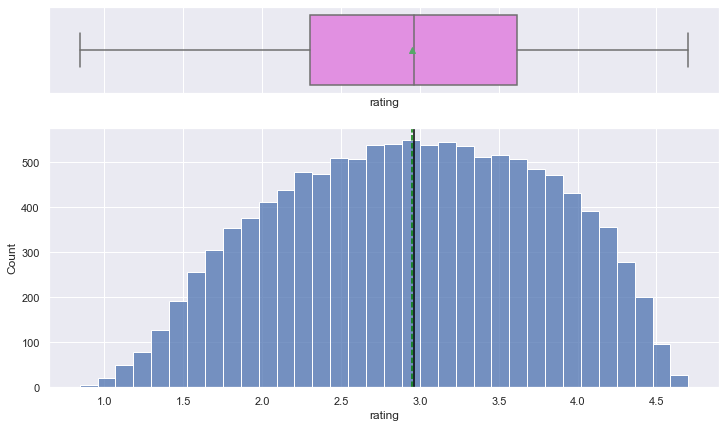

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df1, "rating")

* The anime ratings are kind of normally distributed with much fatter tails.

### `eps`

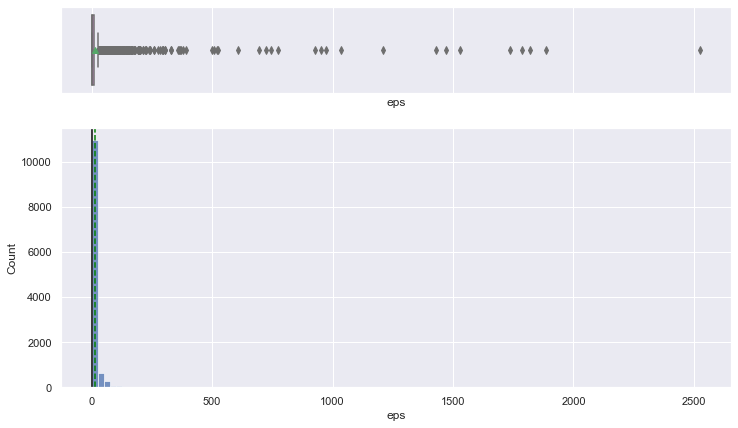

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df1, "eps", bins=100)

* The distribution is heavily right-skewed, as there are many anime movies in the data and they are considered to be of only one episode (as per data description).

### `duration`

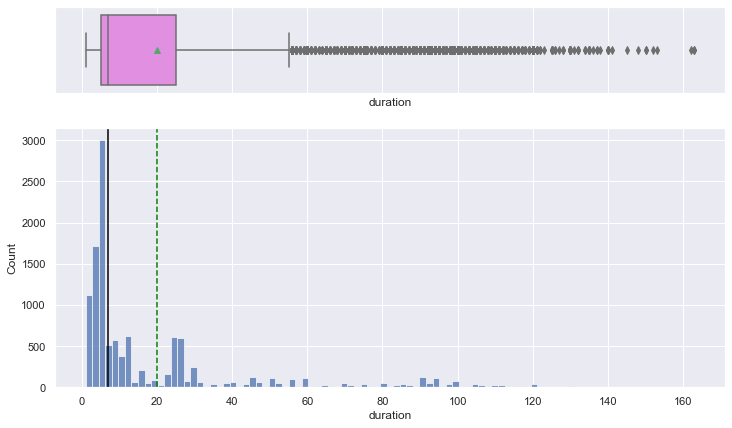

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df1, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

### `watched`

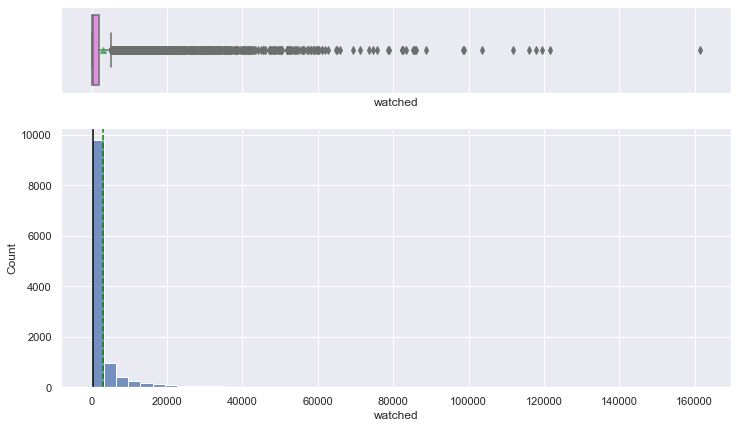

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df1, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

### `watching`

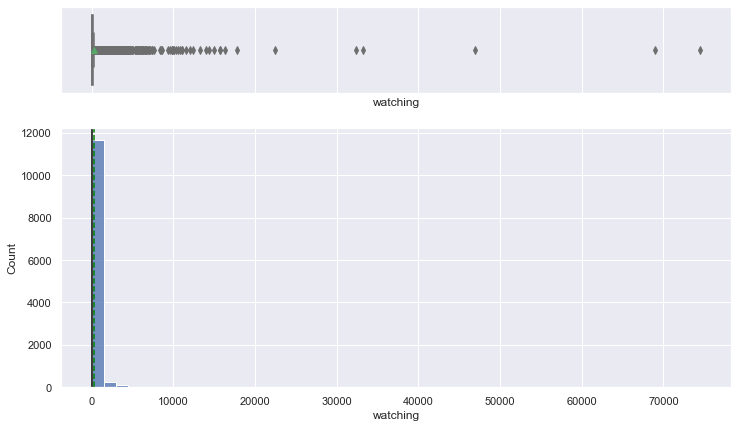

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df1, "watching", bins=50)

* The distribution is heavily right-skewed.

### `wantWatch`

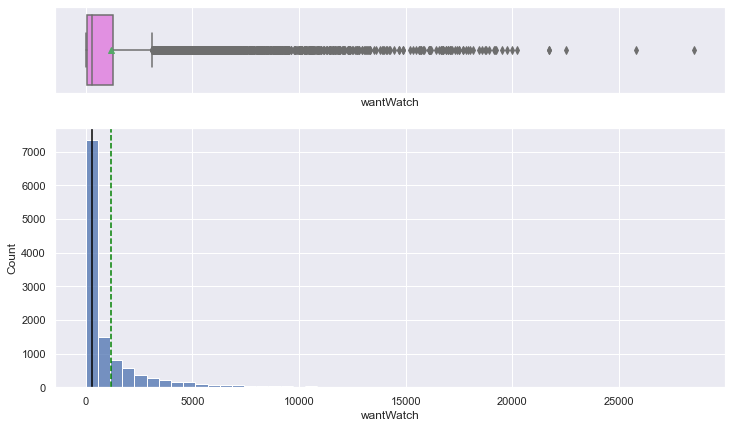

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df1, "wantWatch", bins=50)

* The distribution is heavily right-skewed.

### `dropped`

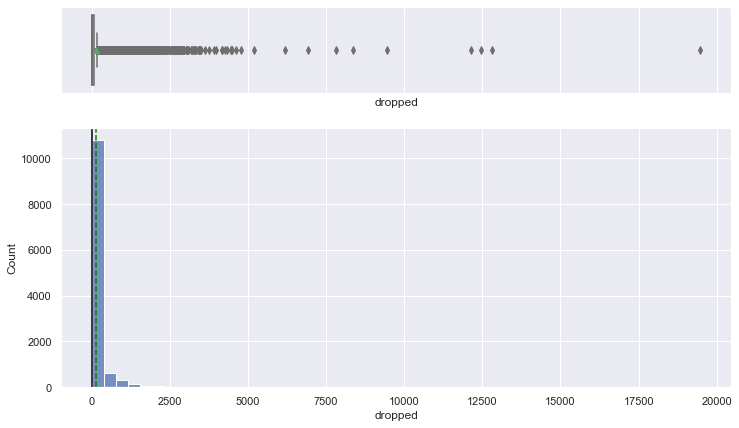

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df1, "dropped", bins=50)

* The distribution is heavily right-skewed.

### `votes`

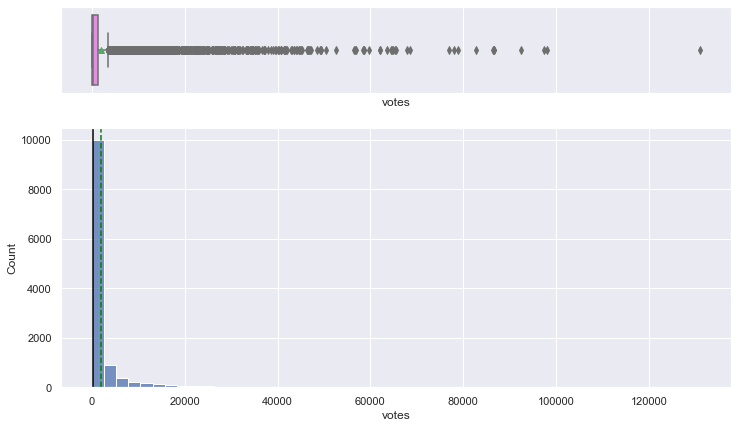

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df1, "votes", bins=50)

* The distribution is heavily right-skewed, and few shows have more than 10000 votes.

### `years_running`

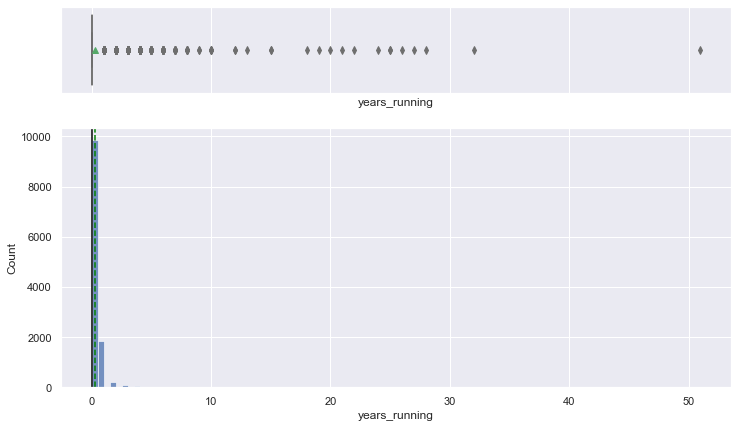

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df1, "years_running", bins=100)

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

In [38]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### `mediaType`

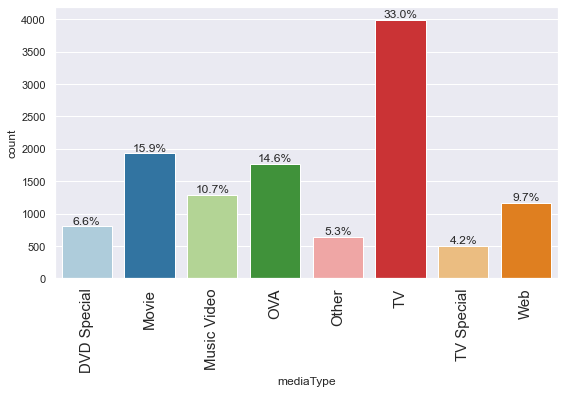

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df1, "mediaType", perc=True)

* Most of the anime now are released for TV.

### `ongoing`

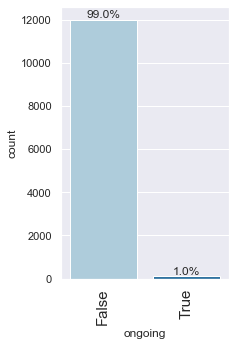

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df1, "ongoing", perc=True)

* Very few anime in the data are ongoing.

### `sznOfRelease`

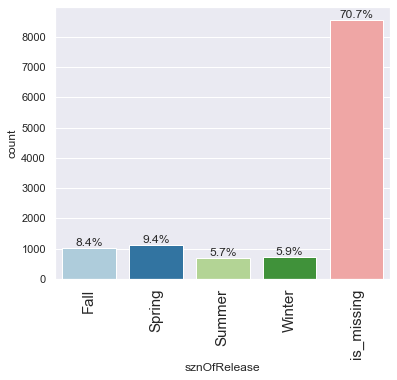

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df1, "sznOfRelease", perc=True)

* More anime are released in fall and spring compared to summer and winter.

### `studio_primary`

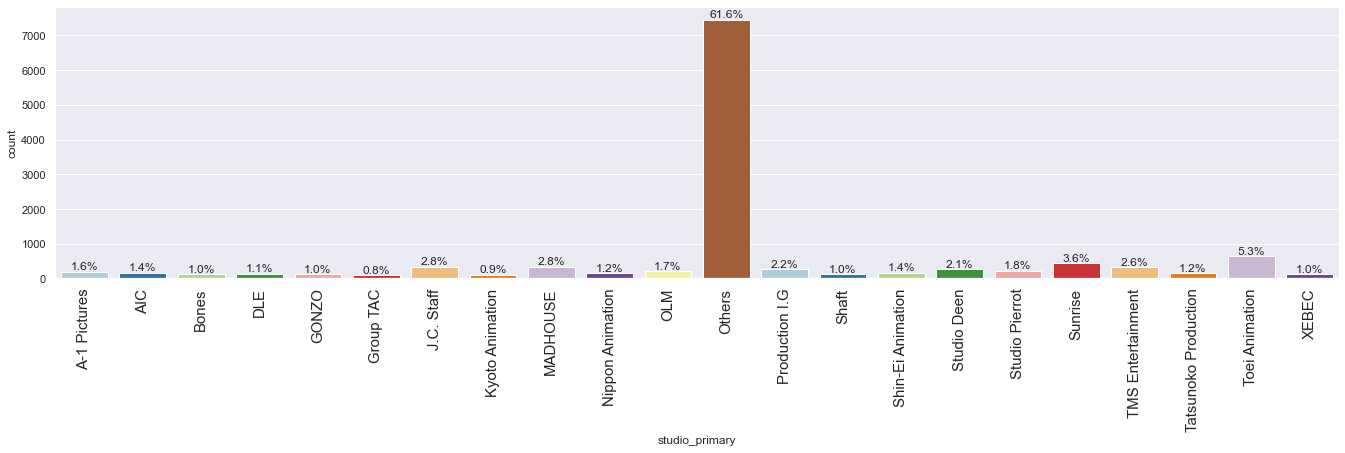

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df1, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names.

### `studios_colab`

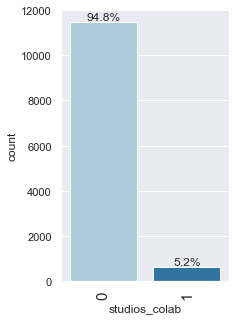

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df1, "studios_colab", perc=True)

- Nearly 95% of the anime in the data do not involve a collaboration between studios.

### `contentWarn`

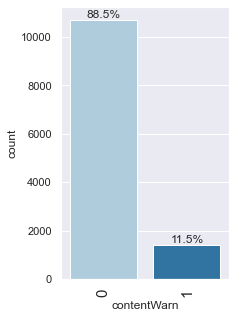

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df1, "contentWarn", perc=True)

- Nearly 90% of the anime in the data do not have an associated content warning.

In [45]:
# creating a list of tag columns
tag_cols = [item for item in df1.columns if "tag" in item]

<IPython.core.display.Javascript object>

In [46]:
# checking the values in tag columns
for column in tag_cols:
    print(df1[column].value_counts())
    print("-" * 50)

0    8799
1    3302
Name: tag_'Comedy', dtype: int64
--------------------------------------------------
0    8582
1    3519
Name: tag_'Based on a Manga', dtype: int64
--------------------------------------------------
0    9303
1    2798
Name: tag_'Action', dtype: int64
--------------------------------------------------
0    9904
1    2197
Name: tag_'Fantasy', dtype: int64
--------------------------------------------------
0    10089
1     2012
Name: tag_'Sci Fi', dtype: int64
--------------------------------------------------
0    10348
1     1753
Name: tag_'Shounen', dtype: int64
--------------------------------------------------
0    10927
1     1174
Name: tag_'Family Friendly', dtype: int64
--------------------------------------------------
0    10465
1     1636
Name: tag_'Original Work', dtype: int64
--------------------------------------------------
0    10740
1     1361
Name: tag_'Non-Human Protagonists', dtype: int64
--------------------------------------------------
0    10845

<IPython.core.display.Javascript object>

* There are 3519 anime that are based on manga.
* There are 3302 anime of the Comedy genre.
* There are 1115 anime of the Romance genre.

### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [47]:
# creating a list of non-tag columns
corr_cols = [item for item in df1.columns if "tag" not in item]
# removing studi colaboration column as it is binomial
corr_cols.remove("studios_colab")
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes', 'studio_primary', 'years_running']


<IPython.core.display.Javascript object>

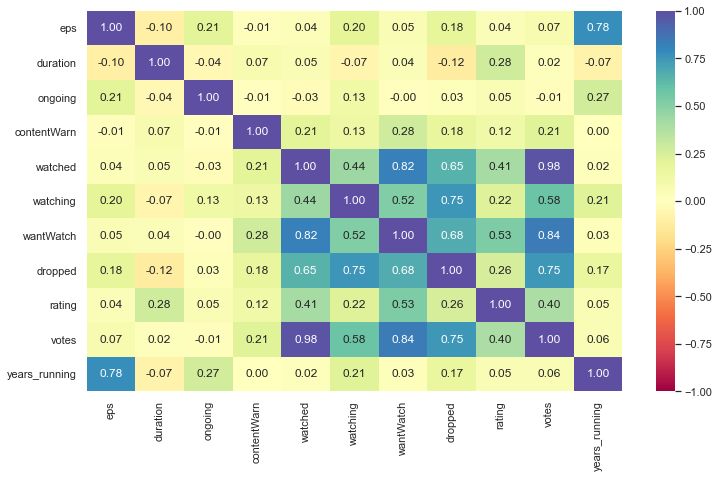

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `watched` and `wantWatch` columns are highly correlated.
* `watched` and `votes` columns are very highly correlated.
* `wantWatch` and `votes` columns are highly correlated.

### Let's check the variation in `rating` with some of the categorical columns in our data.

### `mediaType` vs `rating`

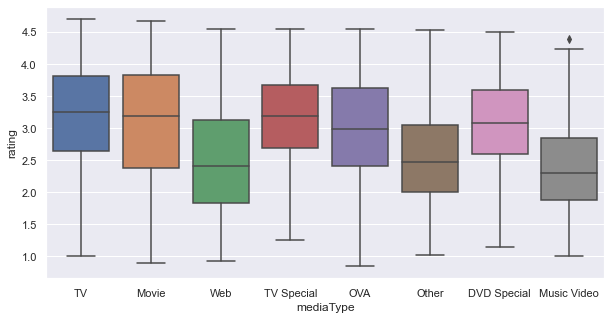

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=df1)
plt.show()

* Anime available as web series or music videos have a lower rating in general.

### `sznOfRelease` vs `rating`

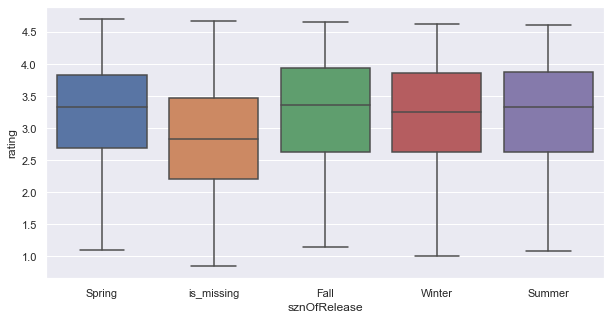

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=df1)
plt.show()

* Anime ratings are similarly distributed across all the available seasons of release.

### `studio_primary` vs `rating`

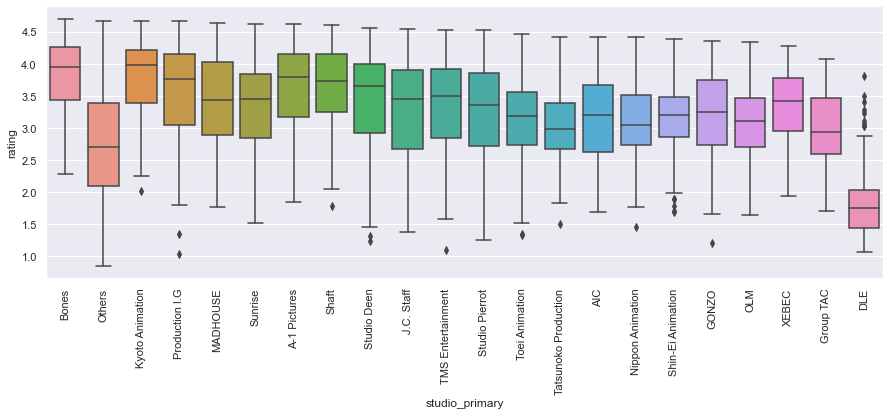

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=df1)
plt.xticks(rotation=90)
plt.show()

* In general, the ratings are low for anime created by *DLE* studios.
* Ratings are also low, in general, for anime created by studios other than the ones in the data.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- Columns like `title`, `description`, `mediaType`, etc. are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are a lot of missing values in the data.


**Data Cleaning:**

- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- The missing values in the data are treated as follows:
    - Missing values in the target variable `rating` were dropped.
    - Missing values in `startYr` were dropped.
    - Missing values in `finishYr` were imputed with *2020*.
    - Missing values in `sznOfRelease` were imputed with a new category *'is_missing'*.
    - Missing values in `mediaType` were imputed with a new category *'Other'*.
    - Missing values in `duration` and `watched` columns were imputed by the median values grouped by `studio_primary` and `mediaType`. The remaining missing values in these columns, if any, were imputed by column medians over the entire data.
- The `startYr` and `finishYr` columns were combined to create a new feature `years_running`. The original columns were then dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of ~2.95. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 296 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 152 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 10000 votes.
- `mediaType`: 33% of the anime are published for TV, 11% as music videos, and 10% as web series. Anime available as web series or music videos have a lower rating in general
- `ongoing`: 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for more than 70% of the anime in the data, and more anime are released in spring and fall compared to summer and winter. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: More than 60% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: Around 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Nearly 90% of the anime in the data do not have an associated content warning.
- `tag_<tag/genre>`: There are 3519 anime that are based on manga, 3302 of the Comedy genre, 2798 of the Action genre, 1115 anime of the Romance genre, and more.

## Variable Transformations

- Let us check the numeric columns other than the *tag* columns for skewness.

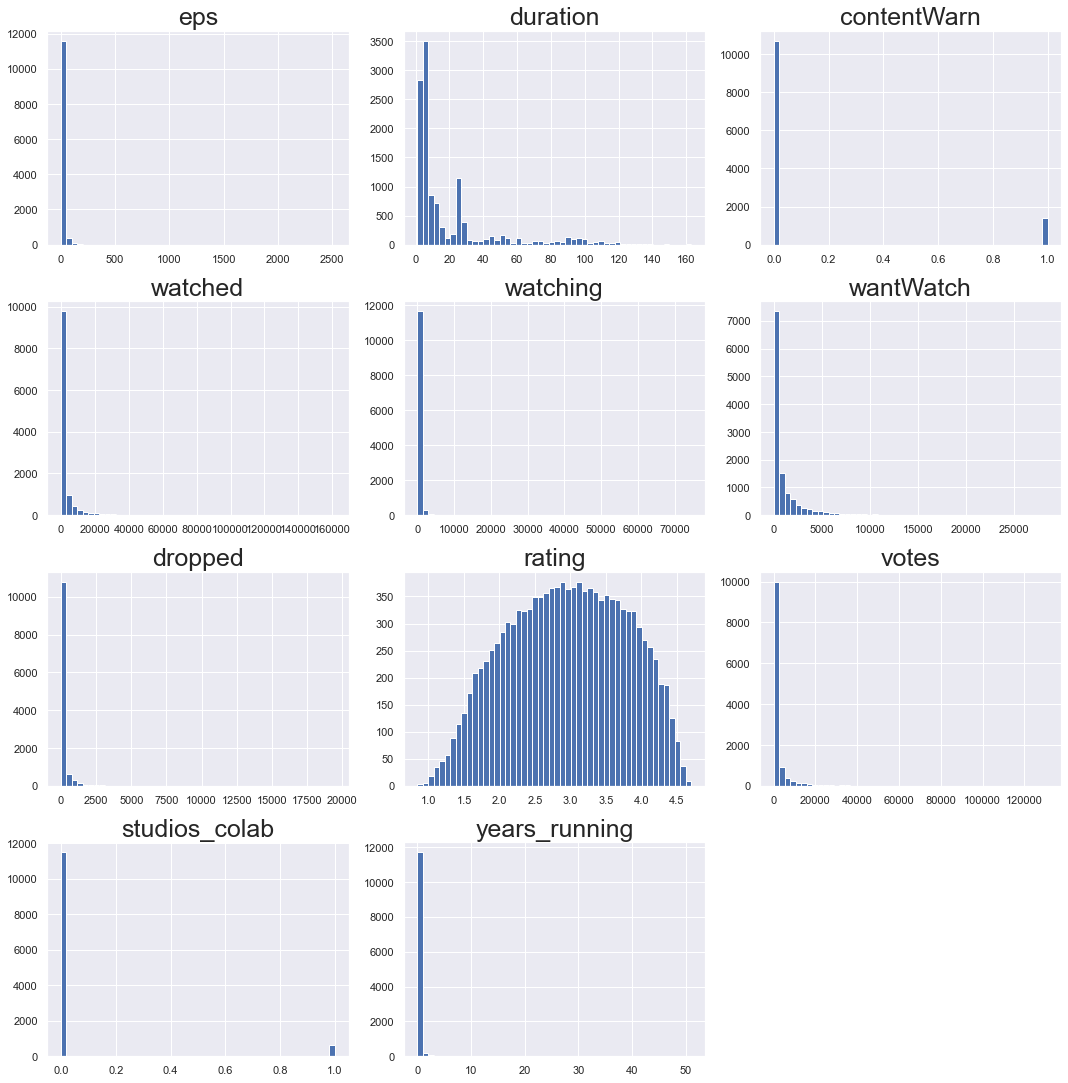

<IPython.core.display.Javascript object>

In [52]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df1.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to all but the `contentWarn`, `studios_colab`, and `rating` columns to deal with skewness in the data.**

In [53]:
# creating a copy of the dataframe
df2 = df1.copy()

# removing contentWarn and studios_colab columns as they have only 0 and 1 values
dist_cols.remove("contentWarn")
dist_cols.remove("studios_colab")

# also dropping the rating column as it is almost normally distributed
dist_cols.remove("rating")

<IPython.core.display.Javascript object>

In [54]:
# using log transforms on some columns

for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,mediaType,ongoing,sznOfRelease,contentWarn,rating,studio_primary,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log
0,TV,False,Spring,1,4.702,Bones,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,11.368454,0.693147
1,Movie,False,is_missing,0,4.663,Others,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,10.691058,0.000000
2,Movie,False,is_missing,1,4.661,Kyoto Animation,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,10.426825,0.000000
3,TV,False,Fall,0,4.660,Production I.G,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,9.765546,0.000000
4,TV,False,Spring,1,4.650,Others,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,9.667132,0.000000


<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

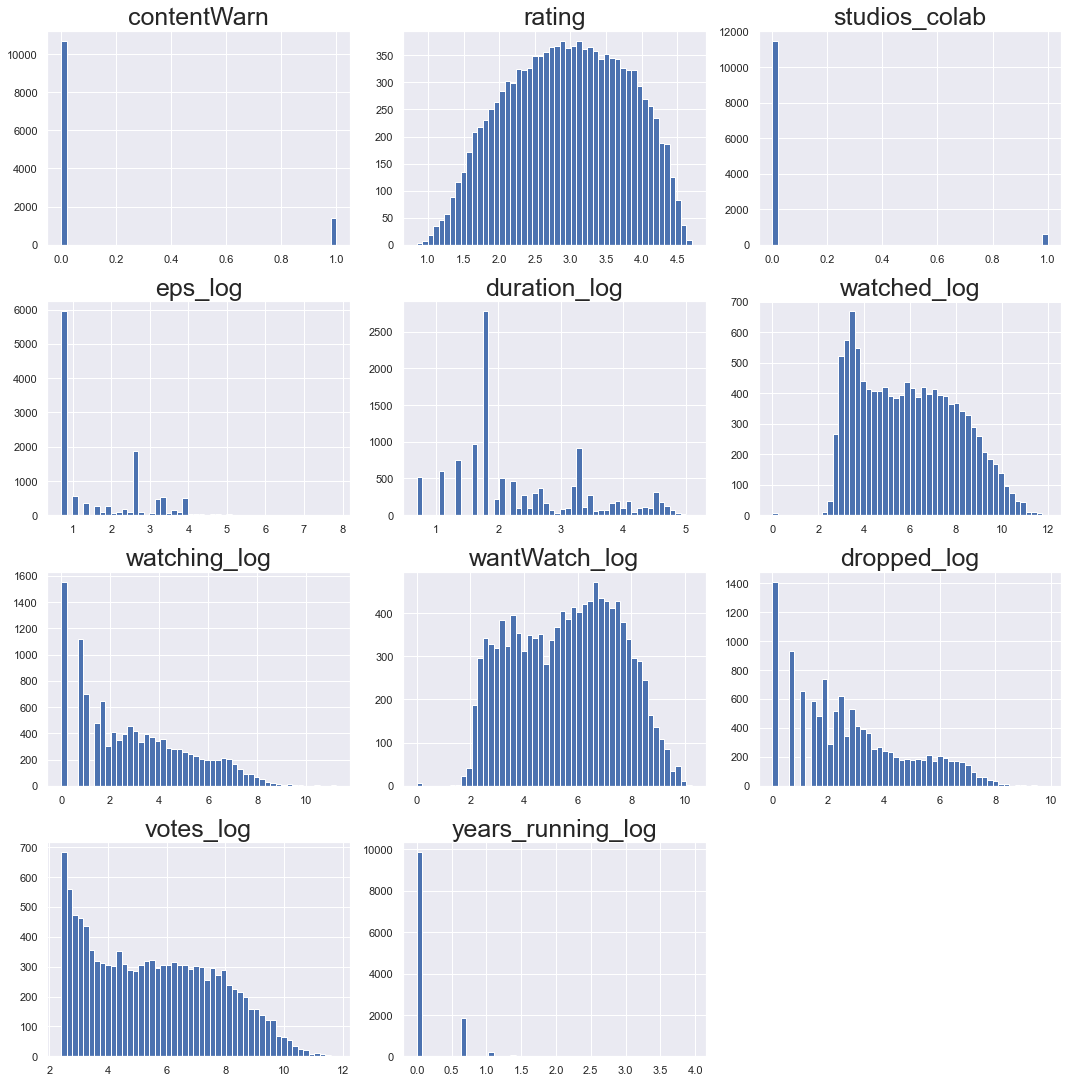

<IPython.core.display.Javascript object>

In [55]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    # sns.histplot(data=df2, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are still skewed, but not as heavily as before.

**Let's check for correlations between the columns (other than the tag columns)**

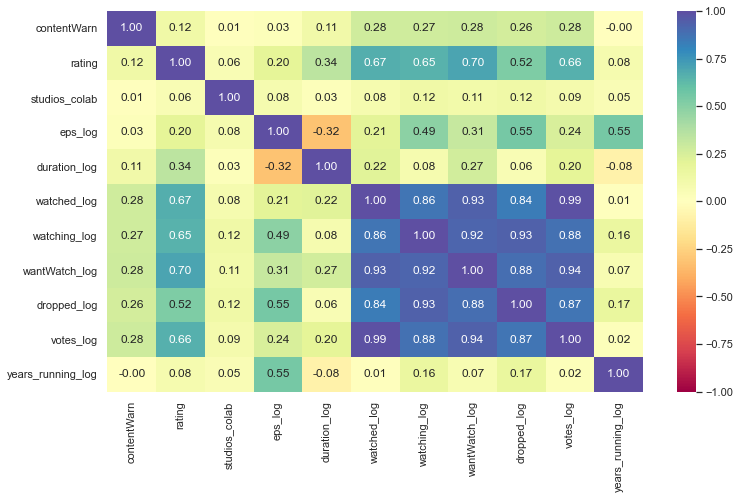

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df2[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are a few very highly correlated columns.

## Model Building

In [57]:
# define dependent variable
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

<IPython.core.display.Javascript object>

In [58]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [59]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,ongoing,contentWarn,studios_colab,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Adventure',tag_'Short Episodes',tag_'Drama',tag_'Shorts',tag_'Romance',tag_'School Life',tag_'Slice of Life',tag_'Animal Protagonists',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'CG Animation',tag_'Mecha',tag_'Ecchi',tag_'Based on a Light Novel',tag_'Anthropomorphic',tag_'Superpowers',tag_'Promotional',tag_'Sports',tag_'Historical',tag_'Vocaloid',tag_Others,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_Group TAC,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,11.368454,0.693147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,10.691058,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,10.426825,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,9.765546,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,9.667132,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [60]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8470
Number of rows in test data = 3631


<IPython.core.display.Javascript object>

In [62]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     257.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:00:59   Log-Likelihood:                -5382.9
No. Observations:                8470   AIC:                         1.092e+04
Df Residuals:                    8395   BIC:                         1.144e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [63]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [64]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.456844,0.357024,0.694225,0.691493,14.199569


<IPython.core.display.Javascript object>

In [65]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.476685,0.371315,0.669842,0.662877,14.779741


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.69 and 0.67, indicating that the model explains 69% and 67% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.37 on the test set.

- MAPE of 14.78 on the test data means that we are able to predict within 15% of the anime rating.